In [171]:
#coding=utf-8
import json
import geopandas
import matplotlib.pyplot as plt
import requests
import pandas as pd
import time
import os
import numpy as np
import matplotlib as mpl
import seaborn as sns
import json
import geopandas
import matplotlib.pyplot as plt
import requests
from shapely.geometry import LineString
import time
import os

In [172]:
import os
filePath = '/Users/jackyanghc/Desktop/Jupyter'
filename = []
for i,j,k in os.walk(filePath):
    for m in j:
        if m[0] == 'S':
            filename.append(m)

ShangHai = geopandas.read_file(filename[0],encoding='utf-8')
for i in range(1,len(filename)):444444
    tmp = geopandas.read_file(filename[i],encoding='utf-8')
    ShangHai = pd.concat([ShangHai,tmp])

print(ShangHai)

         name            Timestamp  \
0       申嘉湖高速  2019_11_20 19:02:00   
1       申嘉湖高速  2019_11_20 19:02:00   
2      上海绕城高速  2019_11_20 19:02:00   
3      上海绕城高速  2019_11_20 19:02:00   
4       ３２４省道  2019_11_20 19:02:00   
...       ...                  ...   
97021     华申路  2019_11_20 14:00:00   
97022     华申路  2019_11_20 14:00:00   
97023    五洲大道  2019_11_20 14:00:00   
97024     申江路  2019_11_20 14:00:00   
97025     东靖路  2019_11_20 14:00:00   

                                                   Lcode  speed Congestion  \
0      4054,4056,4061,4063,4604,4066,4069,4070,4072,4...     95          1   
1      -4084,-4083,-4079,-4078,-4076,-4072,-4070,-406...     95          1   
2      2011,2010,2009,2008,2007,2006,2005,2392,2001,2000     80          1   
3      -1994,-1995,-1996,-1998,-2000,-2001,-2392,-200...     80          1   
4      4096,4098,4106,4107,4110,4116,4127,4128,4129,4...     45          1   
...                                                  ...    ...        ... 

In [173]:
ShangHai = ShangHai.drop_duplicates(
    keep='first',
    inplace=False)
ShangHai = ShangHai.reset_index(drop=True)
ShangHai

,name,Timestamp,Lcode,speed,Congestion,lenght,geometry
0,申嘉湖高速,2019_11_20 19:02:00,"4054,4056,4061,4063,4604,4066,4069,4070,4072,4...",95,1,0.827757,"LINESTRING (120.99678 30.94682, 120.99790 30.9..."
1,申嘉湖高速,2019_11_20 19:02:00,"-4084,-4083,-4079,-4078,-4076,-4072,-4070,-406...",95,1,0.827588,"LINESTRING (121.79185 31.09912, 121.78603 31.0..."
2,上海绕城高速,2019_11_20 19:02:00,"2011,2010,2009,2008,2007,2006,2005,2392,2001,2000",80,1,0.422366,"LINESTRING (121.21579 30.88882, 121.21603 30.8..."
3,上海绕城高速,2019_11_20 19:02:00,"-1994,-1995,-1996,-1998,-2000,-2001,-2392,-200...",80,1,0.622420,"LINESTRING (121.29923 31.37005, 121.29452 31.3..."
4,３２４省道,2019_11_20 19:02:00,"4096,4098,4106,4107,4110,4116,4127,4128,4129,4...",45,1,0.784077,"LINESTRING (121.13834 30.93422, 121.14327 30.9..."
...,...,...,...,...,...,...,...
819889,富特东三路,2019_11_20 14:00:00,"-5100,-5099",45,1,0.020251,"LINESTRING (121.62429 31.31754, 121.62455 31.3..."
819890,日樱南路,2019_11_20 14:00:00,"2425,2427,2430",35,1,0.012501,"LINESTRING (121.61915 31.30352, 121.61916 31.3..."
819891,日樱南路,2019_11_20 14:00:00,-2425,51,1,0.003214,"LINESTRING (121.61895 31.30673, 121.61894 31.3..."
819892,庭安路,2019_11_20 14:00:00,"-6135,-6134",30,1,0.010935,"LINESTRING (121.60021 31.32492, 121.59995 31.3..."


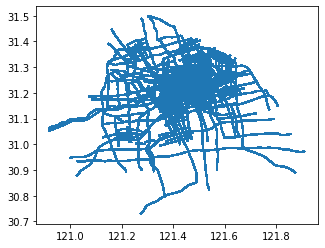

In [174]:
ShangHai.plot()

In [175]:
Roads = geopandas.GeoDataFrame()
all_Roads = ShangHai[['name','Lcode','lenght',"geometry"]]

In [ ]:
for i in range(len(all_Roads)):
    if len(all_Roads.loc[i]["Lcode"].split(',')) == 1:
        Roads = Roads.append(all_Roads.loc[i])
    else:
        continue

In [ ]:
Roads = Roads.drop_duplicates(
    subset=[ 'Lcode'],
    keep='first',
    inplace=False)
Roads = Roads.reset_index(drop=True)
Roads

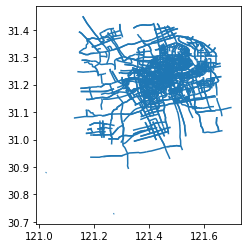

In [149]:
Roads.plot()

In [150]:
Lcodes = ShangHai['Lcode']
Code_list = []

for i in range(len(Lcodes)):
    s = Lcodes[i].split(',')
    for j in s:
        Code_list.append(j)
set_code = set(Code_list)
print(len(set_code))

6016


In [12]:
# 是否有相反的值
for i in set_code:
    for j in set_code:
        if int(i)+int(j)==0:
            print("woo!",i,j)

woo! -704 704
woo! -6159 6159
woo! 2473 -2473
woo! 5854 -5854
woo! 5533 -5533
woo! -159 159
woo! 1211 -1211
woo! -6039 6039
woo! -4833 4833
woo! -2811 2811
woo! 5164 -5164
woo! 4879 -4879
woo! -1434 1434
woo! 3973 -3973
woo! 3995 -3995
woo! 4883 -4883
woo! 514 -514
woo! 1178 -1178
woo! 5569 -5569
woo! -3880 3880
woo! 4644 -4644
woo! 1609 -1609
woo! -4891 4891
woo! -4633 4633
woo! 2195 -2195
woo! 2821 -2821
woo! 1838 -1838
woo! 5867 -5867
woo! -1472 1472
woo! -3681 3681
woo! 5724 -5724
woo! -2906 2906
woo! 2426 -2426
woo! -1949 1949
woo! -2135 2135
woo! -819 819
woo! 5041 -5041
woo! -4175 4175
woo! -5720 5720
woo! 450 -450
woo! 2944 -2944
woo! -5516 5516
woo! -3401 3401
woo! -6009 6009
woo! 1269 -1269
woo! -99 99
woo! -2137 2137
woo! -4725 4725
woo! 428 -428
woo! -4603 4603
woo! 609 -609
woo! 2886 -2886
woo! 1913 -1913
woo! 2662 -2662
woo! 4187 -4187
woo! 5553 -5553
woo! -3661 3661
woo! 6033 -6033
woo! -4817 4817
woo! -2706 2706
woo! -5831 5831
woo! -978 978
woo! -581 581
woo! 4378 -437

woo! -1687 1687
woo! -4257 4257
woo! -473 473
woo! -1339 1339
woo! 4512 -4512
woo! 1693 -1693
woo! -915 915
woo! 1535 -1535
woo! -791 791
woo! -1678 1678
woo! -5202 5202
woo! -1693 1693
woo! 1673 -1673
woo! 1357 -1357
woo! -1934 1934
woo! -1205 1205
woo! -5560 5560
woo! -2948 2948
woo! 2085 -2085
woo! -5078 5078
woo! 903 -903
woo! 3700 -3700
woo! -5579 5579
woo! -5645 5645
woo! -2214 2214
woo! -5840 5840
woo! -2651 2651
woo! 5861 -5861
woo! 1765 -1765
woo! -4779 4779
woo! 4872 -4872
woo! 991 -991
woo! 5182 -5182
woo! -1909 1909
woo! -909 909
woo! 6212 -6212
woo! -4971 4971
woo! 1990 -1990
woo! -3822 3822
woo! -5874 5874
woo! -2392 2392
woo! -58 58
woo! 1635 -1635
woo! -523 523
woo! 1222 -1222
woo! -143 143
woo! 1280 -1280
woo! -2213 2213
woo! -3220 3220
woo! 1197 -1197
woo! -5563 5563
woo! -4409 4409
woo! -542 542
woo! -2493 2493
woo! 1137 -1137
woo! 3194 -3194
woo! -1755 1755
woo! -2220 2220
woo! -2330 2330
woo! -808 808
woo! -4636 4636
woo! 50 -50
woo! -5539 5539
woo! -5529 5529
woo!

woo! -6094 6094
woo! -3050 3050
woo! -6015 6015
woo! 2474 -2474
woo! 616 -616
woo! -1810 1810
woo! -3893 3893
woo! -2104 2104
woo! 4815 -4815
woo! -1331 1331
woo! -5225 5225
woo! 1206 -1206
woo! 470 -470
woo! 274 -274
woo! 4836 -4836
woo! -5538 5538
woo! 2635 -2635
woo! 2319 -2319
woo! -2603 2603
woo! 5521 -5521
woo! 5830 -5830
woo! 4404 -4404
woo! -1913 1913
woo! 3905 -3905
woo! -6181 6181
woo! -4006 4006
woo! -3404 3404
woo! -1312 1312
woo! 1439 -1439
woo! 1445 -1445
woo! 4741 -4741
woo! -578 578
woo! -1518 1518
woo! 4958 -4958
woo! 2753 -2753
woo! 5116 -5116
woo! 1845 -1845
woo! 1041 -1041
woo! -4159 4159
woo! -2046 2046
woo! 2391 -2391
woo! -2556 2556
woo! 4906 -4906
woo! -4195 4195
woo! 4121 -4121
woo! -6103 6103
woo! -1533 1533
woo! 5926 -5926
woo! -2528 2528
woo! 3061 -3061
woo! -5867 5867
woo! 1339 -1339
woo! -231 231
woo! -4523 4523
woo! 6206 -6206
woo! -972 972
woo! 5981 -5981
woo! -3250 3250
woo! -549 549
woo! -750 750
woo! -6211 6211
woo! -3996 3996
woo! -4825 4825
woo! 222

woo! -6092 6092
woo! -5089 5089
woo! 5783 -5783
woo! 706 -706
woo! 4223 -4223
woo! 3324 -3324
woo! 3350 -3350
woo! 5649 -5649
woo! -2802 2802
woo! -6035 6035
woo! 5757 -5757
woo! -1354 1354
woo! -3863 3863
woo! 4262 -4262
woo! -5628 5628
woo! -1371 1371
woo! -6122 6122
woo! -6026 6026
woo! -5642 5642
woo! 584 -584
woo! -4420 4420
woo! -2328 2328
woo! -4449 4449
woo! 4816 -4816
woo! -672 672
woo! 4242 -4242
woo! -366 366
woo! -2109 2109
woo! 4590 -4590
woo! -5126 5126
woo! -559 559
woo! -6212 6212
woo! -142 142
woo! -1648 1648
woo! -659 659
woo! -3346 3346
woo! -2078 2078
woo! -5550 5550
woo! -448 448
woo! 72 -72
woo! 5580 -5580
woo! 5665 -5665
woo! -6215 6215
woo! -683 683
woo! -6153 6153
woo! 4692 -4692
woo! 152 -152
woo! 1691 -1691
woo! -5891 5891
woo! 1335 -1335
woo! -3152 3152
woo! -1575 1575
woo! 1996 -1996
woo! -4686 4686
woo! 2532 -2532
woo! -2249 2249
woo! 4721 -4721
woo! 2839 -2839
woo! -4070 4070
woo! 138 -138
woo! 3256 -3256
woo! 505 -505
woo! 4469 -4469
woo! 511 -511
woo! -

woo! -1573 1573
woo! 4190 -4190
woo! 1518 -1518
woo! 5055 -5055
woo! -5680 5680
woo! -1227 1227
woo! -6152 6152
woo! -6067 6067
woo! 5109 -5109
woo! 4660 -4660
woo! 1358 -1358
woo! -5150 5150
woo! 3521 -3521
woo! -3980 3980
woo! -5588 5588
woo! 4518 -4518
woo! -59 59
woo! 1882 -1882
woo! -935 935
woo! -2101 2101
woo! 95 -95
woo! 1365 -1365
woo! -6074 6074
woo! -2483 2483
woo! 4191 -4191
woo! 447 -447
woo! -1057 1057
woo! 713 -713
woo! 1240 -1240
woo! -936 936
woo! 77 -77
woo! 5534 -5534
woo! 4373 -4373
woo! 1325 -1325
woo! -4626 4626
woo! 651 -651
woo! -2798 2798
woo! 2003 -2003
woo! -4973 4973
woo! -1742 1742
woo! 2444 -2444
woo! -5852 5852
woo! 5874 -5874
woo! -1526 1526
woo! 3364 -3364
woo! 550 -550
woo! 1689 -1689
woo! -2133 2133
woo! -4812 4812
woo! 1262 -1262
woo! 4204 -4204
woo! -1549 1549
woo! -1741 1741
woo! -1091 1091
woo! 5502 -5502
woo! 5674 -5674
woo! -5580 5580
woo! 3120 -3120
woo! 6035 -6035
woo! 2766 -2766
woo! -2850 2850
woo! 1719 -1719
woo! -2212 2212
woo! 4716 -4716


woo! -5721 5721
woo! -1908 1908
woo! 3992 -3992
woo! 1196 -1196
woo! 3144 -3144
woo! 4440 -4440
woo! 4849 -4849
woo! -283 283
woo! 1186 -1186
woo! 6135 -6135
woo! 5831 -5831
woo! -6210 6210
woo! 1324 -1324
woo! 5156 -5156
woo! -1930 1930
woo! 4160 -4160
woo! -2074 2074
woo! 5888 -5888
woo! -4475 4475
woo! -5659 5659
woo! 6105 -6105
woo! 4537 -4537
woo! 4935 -4935
woo! 1010 -1010
woo! -5530 5530
woo! -1897 1897
woo! -3048 3048
woo! -27 27
woo! -1743 1743
woo! -1765 1765
woo! 4445 -4445
woo! -3698 3698
woo! -3326 3326
woo! -4465 4465
woo! -3229 3229
woo! -1667 1667
woo! 4464 -4464
woo! -1430 1430
woo! 1394 -1394
woo! 2249 -2249
woo! 2865 -2865
woo! 2224 -2224
woo! 2134 -2134
woo! -567 567
woo! 3195 -3195
woo! 3113 -3113
woo! 1639 -1639
woo! 4359 -4359
woo! 2120 -2120
woo! 543 -543
woo! 31 -31
woo! 1464 -1464
woo! 2373 -2373
woo! -4469 4469
woo! 1665 -1665
woo! 752 -752
woo! -4635 4635
woo! -603 603
woo! -4803 4803
woo! -5827 5827
woo! -2203 2203
woo! -3037 3037
woo! -4532 4532
woo! 1930 

woo! -2047 2047
woo! -503 503
woo! 564 -564
woo! -1757 1757
woo! -5101 5101
woo! -1403 1403
woo! -2460 2460
woo! 2167 -2167
woo! 984 -984
woo! 3007 -3007
woo! -13 13
woo! -1408 1408
woo! 2544 -2544
woo! 1251 -1251
woo! 2398 -2398
woo! -4211 4211
woo! -4371 4371
woo! 5954 -5954
woo! 4484 -4484
woo! 5000 -5000
woo! 1194 -1194
woo! 4954 -4954
woo! 4985 -4985
woo! -1413 1413
woo! -5537 5537
woo! -5556 5556
woo! -1169 1169
woo! 4026 -4026
woo! -2063 2063
woo! -4066 4066
woo! -280 280
woo! 3639 -3639
woo! -4660 4660
woo! 1810 -1810
woo! 170 -170
woo! 5086 -5086
woo! 3097 -3097
woo! 1372 -1372
woo! -2157 2157
woo! -160 160
woo! -2797 2797
woo! -3627 3627
woo! -4732 4732
woo! -1535 1535
woo! -4690 4690
woo! -4544 4544
woo! -1264 1264
woo! 821 -821
woo! -4673 4673
woo! -2255 2255
woo! -678 678
woo! -1257 1257
woo! 4598 -4598
woo! -6119 6119
woo! 904 -904
woo! 360 -360
woo! 2038 -2038
woo! 3977 -3977
woo! -5067 5067
woo! 4398 -4398
woo! 3192 -3192
woo! 1286 -1286
woo! 1309 -1309
woo! -4820 4820


woo! -740 740
woo! -2129 2129
woo! 193 -193
woo! -4877 4877
woo! 1980 -1980
woo! 3862 -3862
woo! 546 -546
woo! 4914 -4914
woo! -4787 4787
woo! 3355 -3355
woo! 2049 -2049
woo! -452 452
woo! -1967 1967
woo! 2688 -2688
woo! -4241 4241
woo! -597 597
woo! 4054 -4054
woo! 4222 -4222
woo! -4834 4834
woo! -4738 4738
woo! -232 232
woo! 1419 -1419
woo! -2245 2245
woo! 679 -679
woo! -1657 1657
woo! -1347 1347
woo! 341 -341
woo! -4144 4144
woo! 2443 -2443
woo! -481 481
woo! -751 751
woo! -1696 1696
woo! -3477 3477
woo! 5636 -5636
woo! 4732 -4732
woo! 2455 -2455
woo! -4644 4644
woo! 2346 -2346
woo! -3063 3063
woo! -5801 5801
woo! -1651 1651
woo! 4095 -4095
woo! 4110 -4110
woo! 1959 -1959
woo! 2097 -2097
woo! 687 -687
woo! 4048 -4048
woo! -2039 2039
woo! 2619 -2619
woo! -124 124
woo! 435 -435
woo! -1798 1798
woo! -4454 4454
woo! 3285 -3285
woo! -4064 4064
woo! 2889 -2889
woo! 102 -102
woo! -6125 6125
woo! -5954 5954
woo! -4672 4672
woo! 4946 -4946
woo! 5995 -5995
woo! 4377 -4377
woo! 5834 -5834
woo!

woo! 3778 -3778
woo! -3289 3289
woo! 4367 -4367
woo! -4084 4084
woo! -2204 2204
woo! 3220 -3220
woo! 4817 -4817
woo! -1471 1471
woo! -16 16
woo! -3713 3713
woo! -3706 3706
woo! 189 -189
woo! -1238 1238
woo! -4649 4649
woo! 4550 -4550
woo! -5686 5686
woo! -524 524
woo! 11 -11
woo! -3977 3977
woo! 1720 -1720
woo! 5948 -5948
woo! 928 -928
woo! -5938 5938
woo! 5876 -5876
woo! -2271 2271
woo! -241 241
woo! -1868 1868
woo! 119 -119
woo! -1862 1862
woo! -5755 5755
woo! 5774 -5774
woo! 5684 -5684
woo! -88 88
woo! -3343 3343
woo! -2347 2347
woo! 5775 -5775
woo! -3394 3394
woo! -5903 5903
woo! 2482 -2482
woo! 231 -231
woo! -4173 4173
woo! 3095 -3095
woo! -278 278
woo! 936 -936
woo! 2138 -2138
woo! 4167 -4167
woo! -6045 6045
woo! 2591 -2591
woo! -1344 1344
woo! -1768 1768
woo! 2979 -2979
woo! -420 420
woo! 4454 -4454
woo! 4434 -4434
woo! 2947 -2947
woo! 2033 -2033
woo! -1817 1817
woo! -1178 1178
woo! 1446 -1446
woo! -3195 3195
woo! -3615 3615
woo! 5624 -5624
woo! 975 -975
woo! -2837 2837
woo! -16

In [158]:
for i in range(len(Roads)):
    tmp = Roads.loc[i]
    tmp.loc['Lcode'] = str(int(tmp.loc['Lcode']) * -1)
    Roads = Roads.append(tmp)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [159]:
Roads = Roads.drop_duplicates(
    subset=[ 'Lcode'],
    keep='first',
    inplace=False)
Roads = Roads.reset_index(drop=True)
Roads

,Lcode,geometry,lenght,name
0,6003,"LINESTRING (121.17384 31.08366, 121.17381 31.0...",0.025335,千新公路
1,-6002,"LINESTRING (121.17207 31.10885, 121.17293 31.1...",0.025334,千新公路
2,-6005,"LINESTRING (121.17616 31.10835, 121.17623 31.1...",0.045975,外青松公路
3,6005,"LINESTRING (121.21242 31.08734, 121.21114 31.0...",0.001284,外青松公路
4,-5977,"LINESTRING (121.23105 31.20410, 121.23148 31.2...",0.007630,新凤南路
...,...,...,...,...
5971,-3779,"LINESTRING (121.47620 31.24312, 121.47616 31.2...",0.002939,浙江北路
5972,-2168,"LINESTRING (121.45610 31.36382, 121.45428 31.3...",0.007818,江杨北路
5973,-5104,"LINESTRING (121.60843 31.30365, 121.61390 31.3...",0.010933,五洲大道
5974,-5508,"LINESTRING (121.59714 31.33106, 121.59748 31.3...",0.020019,航津路


In [114]:
 def plot_show(data):
    data.plot(column='lenght', cmap='RdYlGn', legend=True)
    plt.show()

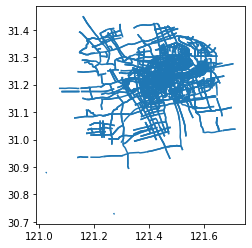

In [160]:
Roads.plot()

In [161]:
all_code = Roads['Lcode'].values.tolist()

for i in range(len(all_Roads)):
    s = all_Roads.loc[i]["Lcode"].split(',')
    lens = len(s)
    if lens == 2:
        for j in range(0,2):
            number = all_code.count(s[j])
#             print(number,i)
            if number == 1:
                tmp = all_Roads.loc[[i]]
#                 print(tmp)
                tmp2 = Roads[Roads['Lcode'] == s[j]]
                tmp2['Lcode'] = s[(j+1)%2]
                for m in tmp2['geometry'].values:
                    q = list(m.coords)
                for k in tmp['geometry'].values:
                    p = list(k.coords)
                ret = []
                for h in p:
                    if h not in q:
                        ret.append(h)
                try:
                    lines = LineString(ret)
                    tmp2['lenght'] = (tmp['lenght'].values - tmp2['lenght'].values)[0]
                    tmp2['geometry'] = lines
                    Roads = Roads.append(tmp2)
                    break;
                except:
                    break;
#                 tmp['geometry'] = tmp['geometry'] - tmp2['geometry']
    else:
        continue

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i


In [164]:
all_code = Roads['Lcode'].values.tolist()

for i in range(len(all_Roads)):
    s = all_Roads.loc[i]["Lcode"].split(',')
    lens = len(s)
    if lens == 3:
        number = []
        print(s)
        for j in range(0,3):
            number.append(all_code.count(s[j]))
        print(number)
        if sum(number) == 2:
            ss = number.index(0)
            s1 = (ss+1)%3
            s2 = (ss+2)%3
            tmp = all_Roads.loc[[i]]
            print(tmp)
            tmp1 = Roads[Roads['Lcode'] == s[s1]]
            print(tmp1)
            tmp2 = Roads[Roads['Lcode'] == s[s2]]
            print(tmp2)
            
            for m in tmp2['geometry'].values:
                q = list(m.coords)
            for c in tmp1['geometry'].values:
                qq = list(m.coords)
            for k in tmp['geometry'].values:
                p = list(k.coords)
            ret = []
            for h in p:
                if h not in q:
                    if h not in qq:
                        ret.append(h)
            try:
                lines = LineString(ret)
                tmp2['lcode']=s[ss]
                tmp2['lenght'] = (tmp['lenght'].values - tmp2['lenght'].values - tmp3['lenght'].values)[0]
                tmp2['geometry'] = lines
                Roads = Roads.append(tmp2)
                print('success')
                break;
            except:
                break;
#                 tmp['geometry'] = tmp['geometry'] - tmp2['geometry']
    else:
        continue

['6220', '6221', '6222']
[1, 1, 1]
['5989', '5990', '5991']
[1, 1, 1]
['-5990', '-5989', '-5988']
[1, 1, 1]
['-5888', '-5887', '-5886']
[0, 0, 1]
['5774', '5775', '5776']
[1, 1, 1]
['-5892', '-5891', '-5890']
[1, 1, 1]
['1998', '1996', '1995']
[0, 1, 1]
      name           Lcode    lenght  \
77  上海绕城高速  1998,1996,1995  0.133357   

                                             geometry  
77  LINESTRING (121.14580 31.27938, 121.14544 31.2...  
     Lcode                                           geometry    lenght  \
5302  1996  LINESTRING (121.22314 31.34734, 121.22202 31.3...  0.033403   

        name  
5302  上海绕城高速  
     Lcode                                           geometry    lenght  \
1848  1995  LINESTRING (121.19222 31.33687, 121.19605 31.3...  0.046029   

        name  
1848  上海绕城高速  


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [165]:
Roads = Roads.drop_duplicates(
    subset=[ 'Lcode'],
    keep='first',
    inplace=False)
Roads = Roads.reset_index(drop=True)
Roads

,Lcode,geometry,lenght,name
0,6003,"LINESTRING (121.17384 31.08366, 121.17381 31.0...",0.025335,千新公路
1,-6002,"LINESTRING (121.17207 31.10885, 121.17293 31.1...",0.025334,千新公路
2,-6005,"LINESTRING (121.17616 31.10835, 121.17623 31.1...",0.045975,外青松公路
3,6005,"LINESTRING (121.21242 31.08734, 121.21114 31.0...",0.001284,外青松公路
4,-5977,"LINESTRING (121.23105 31.20410, 121.23148 31.2...",0.007630,新凤南路
...,...,...,...,...
6179,-1310,"LINESTRING (121.59006 31.24350, 121.59086 31.2...",0.005615,红枫路
6180,-5505,"LINESTRING (121.54384 31.11910, 121.54384 31.1...",0.002800,林海公路
6181,-1665,"LINESTRING (121.53171 31.33172, 121.53171 31.3...",0.000127,中原路
6182,-1354,"LINESTRING (121.54586 31.16510, 121.54576 31.1...",0.000023,高青路


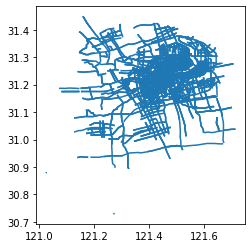

In [167]:
Roads.plot()